#1. 라이브러리 등록
> TransactionEncoder는 각기 다른 길이의 리스트를 같은 길이의 행렬로 만들고 객체가 존재하는 경우 True를 존재하지 않는 경우 False값을 저장한다.

> apriori는 연관성 분석에 사용된다.

> association_rules는 신뢰도 및 향상도를 구하기 위해 사용된다.

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#2. 데이터 만들기
> 이론에서 사용했던 예제를 리스트로 만들어 보자

In [3]:
dataset = [
           ['과자', '라면','선크림','달걀'],
           ['과자', '라면','맥주'],
           ['라면','소주','달걀'],
           ['소주', '맥주','과자'],
           ['라면','파','달걀']
]
type(dataset)

list

#3. 데이터 변환

In [ ]:
te = TransactionEncoder()
te_fit = te.fit(dataset)
te_fit

>TransactionEncoder의 fit 함수는 각기 다른 길이의 데어터들을 같은 길이로 통일시켜주는 기능을 한다. 위의 코드에서 dataset은 첫 데이터가 4, 두 번째 데이터가 3개의 데이터들이 존재한다. 이렇게 다르게 나타나는 값을 나타날 수 있는 모든 경우에 수로 표현한다. 

> 모든 경우의 수는 [과자, 달걀, 라면, 맥주, 소주, 선크림, 파] 총 7가지 이므로 7개의 column과 5개의 row로 이루어진 행렬을 만들게 된다.

In [ ]:
arrayMatrix = te_fit.transform(dataset)
arrayMatrix

> transform은 위에서 만들어진 행렬에 column명과 같은 값이 존재하면 true로 아니면 false로 설정하는 기능을 한다.

> user0는 [과자, 라면, 선크림, 달걀]을 구매했으므로 각 위치에 true가 나머지 위치에는 false가 저장되게 된다.

In [11]:
# te.columns_
import pandas as pd

df = pd.DataFrame(arrayMatrix, columns=te.columns_)
df

,과자,달걀,라면,맥주,선크림,소주,파
0,True,True,True,False,True,False,False
1,True,False,True,True,False,False,False
2,False,True,True,False,False,True,False
3,True,False,False,True,False,True,False
4,False,True,True,False,False,False,True


#4. 데이터 분석

In [13]:
frequent_itemsets = apriori(df)
frequent_itemsets

,support,itemsets
0,0.6,(0)
1,0.6,(1)
2,0.8,(2)
3,0.6,"(1, 2)"


>apriori를 이용해서 간단하게 지지도를 구할 수 있다.

In [ ]:
frequent_itemsets = apriori(df, min_support=0.1)
frequent_itemsets

> min_support는 최소 지지도를 뜻하며 기본값은 0.5이다. 상품과 사용자가 많은 경우 지지도를 상황에 따라 변경하여 추천 리스트를 얻어야 한다. 기본값이 0.5라는 것이지 0.5가 기준이 되는 것은 아니다.

In [21]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(과자)
1,0.6,(달걀)
2,0.8,(라면)
3,0.4,(맥주)
4,0.4,(소주)
5,0.4,"(라면, 과자)"
6,0.4,"(과자, 맥주)"
7,0.6,"(라면, 달걀)"


> use_colnames는 데이터의 index 정보가 아닌 이름 정보를 볼 수 있다.

##4.1 Quiz
> frequent_itemsets 정보 중 itemsets의 item갯수를 출력하시오

In [ ]:
#itemsets feature 얻기
itemsets = frequent_itemsets['itemsets']
print(itemsets)
#각 데이터별 길이 구하기
itemsets_x = itemsets.apply(lambda x : len(x))
print(itemsets_x)

> itemsets feature를 얻어 itemsets이라는 series를 만들고 apply함수를 이용하여 길이를 구한 정보를 출력했다. 현재 출력 결과에서 한 개의 데이터는 '그 데이터가 많이 나타났다.' 즉 그 상품이 많이 팔린 정도를 표현하게 된다. 하지만 우리가 하고자 하는 것은 특정 상품을 구매한 경우 다른 상품을 추천하기 위한 것이므로 두 개 이상의 상품만 찾기 위해 위와 같이 데이터의 갯수를 구한 것이다.

##4.2 Quiz2
> 다음과 같이 나타나도록 dataframe을 수정하시오

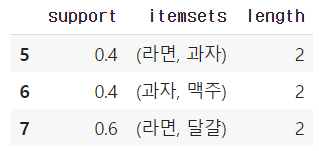

In [26]:
#length feature 만들기
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x : len(x))
frequent_itemsets
#length가 2 이상인 데이터만 추출
frequent_itemsets[frequent_itemsets['length']>=2]

,support,itemsets,length
5,0.4,"(라면, 과자)",2
6,0.4,"(과자, 맥주)",2
7,0.6,"(라면, 달걀)",2


#5. 신뢰도와 향상도

In [28]:
ar = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(라면),(과자),0.8,0.6,0.4,0.500000,0.833333,-0.08,0.8
1,(과자),(라면),0.6,0.8,0.4,0.666667,0.833333,-0.08,0.6
2,(과자),(맥주),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
3,(맥주),(과자),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
4,(라면),(달걀),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(달걀),(라면),0.6,0.8,0.6,1.000000,1.250000,0.12,inf


> 최종적으로 association_rules을 이용하여 신뢰도와 향상도를 확인해 보았다.

> 위에서 사용된 각 옵션들은 다음과 같은 값을 갖는다.
* metric : 확인하고자 하는 정보를 입력한다. 현재 confidence가 입력되어 있으며 신뢰도를 기준으로 결과를 확인하게 된다. 향상도를 확인하기 위해서는 lift를 입력하면 된다.
* min_threshold : metric의 최소 정보이다.

> 실행 결과 다음과 같이 해석할 수 있다.
* confidence 가장 높게 나타난 (맥주)	(과자), (달걀)	(라면)이 가장 신뢰할 수 있는 연관상품으로 나타난다. 맥주를 구매한 경우 과자를 구매할 확률이 높고 달걀을 구매한 경우 라면을 구매할 확률이 높다고 판단할 수 있다. 반대의 경우인 과자를 구매하면 맥주를 구매하는 신뢰도는 0.67로 낮게 나타나 맥주를 구매한 사람이 과자를 구매할 확률이 높다는 것을 알 수 있다.
* lift가 가장 높게 나타난 것은 과자, 맥주 그 다음으로 달걀 라면이다. 이 두 경우는 1보다 큰 값으로 나타났음으로 필연적으로 나타난 구매 패턴임을 알 수 있다. 하지만 라면 과자의 경우 lift가 1이하임으로 우연하게 발생한 구매 패턴이라는 것을 알 수 있다.
* leverage(영향력)는 두 가지가 모두 나타나는 상황에서 각각의 독립적으로 나타나는 비율을 뺀 것으로 범위는 -1에서 1까지이며 0 이하일 경우 독립적이라고 볼 수 있고 0초과인 경우 연관성이 있다고 볼 수 있다. 
** Leverage(X=>Y) = Support(X,Y) - (Support(X) * Support(Y)) = P(X,Y) - (P(X) * P(Y))
* conviction(확신성)은 명확히 어떠한 값을 갖는지 알 수는 없지만 향상도가 1보다 큰 경우 확신성 역시 1보다 큰 값을 갖는다. 확신성의 수식을 풀어보면 결과가 존재하지 않는 경우에서 원인에 따른 결과가 발생하지 않는 경우를 나눈 것으로 수가 클수록 확신성이 높다고 판단된다. 
** Conviction(X=>Y) = ( 1 - Support(Y)) / (1 - Confidence(X=>Y))